In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer

In [5]:
import pandas as pd
df = pd.read_csv('../../dataset_files/drug_dataset.csv')
df = pd.DataFrame(df)
df['title']

0                       Why is this medication prescribed?
1                        How should this medicine be used?
2                             Other uses for this medicine
3                What special precautions should I follow?
4        What special dietary instructions should I fol...
                               ...                        
17738                What other information should I know?
17739                                          Brand names
17740                        In case of emergency/overdose
17741                What other information should I know?
17742                                          Brand names
Name: title, Length: 17743, dtype: object

In [40]:
titles = set(df['title'].str.lower())
sentences = list(titles)
len(sentences)

136

In [4]:
model = SentenceTransformer('paraphrase-mpnet-base-v2')

In [29]:
sentence_embeddings = model.encode(sentences)

In [30]:
# sentence_embeddings[0]
sentence_embeddings.shape

(136, 768)

In [108]:
# Hyperparameter 1 
n_dimention = 10
pca = PCA(n_components=n_dimention)
reduced_data = pca.fit_transform(sentence_embeddings)

In [109]:
reduced_data.shape

(136, 10)

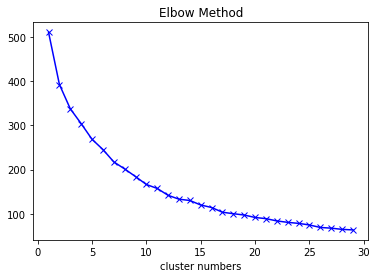

In [110]:
SSE = []

for k in range(1, 30):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(reduced_data)
    SSE.append(kmeans.inertia_)
    
plt.plot(range(1, 30), SSE, 'bx-')
plt.title('Elbow Method')
plt.xlabel('cluster numbers')
plt.show()

In [111]:
# Hyperparameter 2
n_clusters = 7

km = KMeans(n_clusters=n_clusters)

km.fit(reduced_data)
centers = km.cluster_centers_.argsort()[:,::-1]

print("Len of Labels: ",
       len(set(km.labels_)), 
       " Params: ", 
       km.get_params())

Len of Labels:  7  Params:  {'algorithm': 'auto', 'copy_x': True, 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 7, 'n_init': 10, 'n_jobs': 'deprecated', 'precompute_distances': 'deprecated', 'random_state': None, 'tol': 0.0001, 'verbose': 0}


In [112]:
len(centers[0])

10

In [113]:
for i in range(20):
    print(sentences[i], km.predict(reduced_data[i].reshape(-1, 1).T))

what is live, attenuated influenza vaccine-laiv (nasal spray)? [1]
how is the moderna covid-19 vaccine given? [6]
why get vaccinated? [0]
keep your vaccination card [1]
how is the pfizer-biontech covid-19 vaccine given? [6]
what is anthrax vaccine? [1]
who should get je vaccine and when? [0]
about your treatment [5]
talk with your health care provider [5]
what are the risks from yellow fever vaccine? [3]
who should get hepatitis a vaccine and when? [0]
where can i report cases of suspected fraud? [2]
who should not get hpv vaccine or should wait? [0]
what special dietary instructions should i follow? [2]
how can i learn more? [2]
risks of a vaccine reaction [3]
what is meningococcal disease? [1]
what are the benefits of the moderna covid-19 vaccine? [6]
other names [2]
what should i do in case of overdose? [5]
